# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [7]:
# Create a dataframe to hold the retreived city data
city_data = pd.DataFrame({'City': cities})
# Add empty columns for data fetch
city_data['Lat']= ''
city_data['Lon']= ''
city_data['Max Temp']= ''
city_data['Humidity']= ''
city_data['Clouds']= ''
city_data['Wind']= ''
city_data['Country']= ''
city_data['Date']= ''

city_data.head()


,City,Lat,Lon,Max Temp,Humidity,Clouds,Wind,Country,Date
0,hithadhoo,,,,,,,,
1,grytviken,,,,,,,,
2,ornskoldsvik,,,,,,,,
3,kratie,,,,,,,,
4,papatowai,,,,,,,,


In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# From starter code set the group size to 50
group_size = 50
#Split dataframe into groups of 50
groups = [city_data[i:i + group_size] for i in range(0, len(city_data), group_size)]

In [20]:
#Start response retreival
#Print to logger
print("Beginning response Retrieval")
print("-" * 30)

#Loop through each group, print each group number
for group_index, group in enumerate(groups, start=1):
    print(f'Processing Set {group_index} of cities')
    #Loop thorugh each city in the group
    for record_index, (index,row) in enumerate(group.iterrows(), start=1):
        city = row['City']
       #response = None
        # Define the API parameters for each city request
        params = {
            "q": city,
            "apikey":weather_api_key,
            "units": "metric",
        }
        try:
            # Make the API request
            response = requests.get(url, params=params).json()
            #Extract weather response from the API response
            group.at[index, 'Lat'] = response['coord']['lat']
            group.at[index, 'Lon'] = response['coord']['lon']
            group.at[index, 'Max Temp'] = response['main']['temp_max']
            group.at[index, 'Humidity'] = response['main']['humidity']
            group.at[index, 'Clouds'] = response['clouds']['all']
            group.at[index, 'Wind'] = response['wind']['speed']
            group.at[index, 'Country'] = response['sys']['country']
            group.at[index, 'Date'] = response['dt']
            #print statement
            print(f"Processing record {record_index} in group {group_index}, {city} retrieved successfully.")

        except Exception as e:
            print(f"City not found. Skipping {city} ")
            pass
# Indicate that Data Loading is complete 
print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)
        
# put all groups back into a dataframe (used concatenate)            
city_data_df = pd.concat(groups)


Beginning response Retrieval
------------------------------
Processing Set 1 of cities
Processing record 1 in group 1, hithadhoo retrieved successfully.
Processing record 2 in group 1, grytviken retrieved successfully.
Processing record 3 in group 1, ornskoldsvik retrieved successfully.
Processing record 4 in group 1, kratie retrieved successfully.
Processing record 5 in group 1, papatowai retrieved successfully.
Processing record 6 in group 1, port-aux-francais retrieved successfully.
Processing record 7 in group 1, santo antonio do ica retrieved successfully.
Processing record 8 in group 1, argo retrieved successfully.
Processing record 9 in group 1, sarikei retrieved successfully.
Processing record 10 in group 1, waitangi retrieved successfully.
Processing record 11 in group 1, divnogorsk retrieved successfully.
Processing record 12 in group 1, ulaangom retrieved successfully.
Processing record 13 in group 1, merritt retrieved successfully.
City not found. Skipping hayma' 
Processin

Processing record 25 in group 3, aoulef retrieved successfully.
Processing record 26 in group 3, island harbour retrieved successfully.
Processing record 27 in group 3, kingscliff retrieved successfully.
Processing record 28 in group 3, la gi retrieved successfully.
Processing record 29 in group 3, smyshlyayevka retrieved successfully.
Processing record 30 in group 3, parauapebas retrieved successfully.
Processing record 31 in group 3, wenxing retrieved successfully.
Processing record 32 in group 3, thanh hoa retrieved successfully.
Processing record 33 in group 3, thayetmyo retrieved successfully.
Processing record 34 in group 3, sanctuary point retrieved successfully.
Processing record 35 in group 3, juegang retrieved successfully.
Processing record 36 in group 3, el bauga retrieved successfully.
Processing record 37 in group 3, boromo retrieved successfully.
Processing record 38 in group 3, zyrya retrieved successfully.
Processing record 39 in group 3, vanimo retrieved successfully.

Processing record 47 in group 5, ust-nera retrieved successfully.
Processing record 48 in group 5, konarka retrieved successfully.
Processing record 49 in group 5, mariehamn retrieved successfully.
Processing record 50 in group 5, vila franca do campo retrieved successfully.
Processing Set 6 of cities
Processing record 1 in group 6, pahrump retrieved successfully.
Processing record 2 in group 6, betio village retrieved successfully.
Processing record 3 in group 6, chhuikhadan retrieved successfully.
Processing record 4 in group 6, miles city retrieved successfully.
Processing record 5 in group 6, mezhdurechenskiy retrieved successfully.
Processing record 6 in group 6, akobo retrieved successfully.
Processing record 7 in group 6, tomatlan retrieved successfully.
Processing record 8 in group 6, magadan retrieved successfully.
Processing record 9 in group 6, gwoza retrieved successfully.
Processing record 10 in group 6, kilindoni retrieved successfully.
Processing record 11 in group 6, sa

Processing record 23 in group 8, morrope retrieved successfully.
Processing record 24 in group 8, severnoye retrieved successfully.
Processing record 25 in group 8, tan-tan retrieved successfully.
Processing record 26 in group 8, portland retrieved successfully.
Processing record 27 in group 8, yondo retrieved successfully.
Processing record 28 in group 8, amarillo retrieved successfully.
Processing record 29 in group 8, narrabri retrieved successfully.
Processing record 30 in group 8, bonito retrieved successfully.
Processing record 31 in group 8, klaksvik retrieved successfully.
Processing record 32 in group 8, hafnarfjordur retrieved successfully.
Processing record 33 in group 8, pocatello retrieved successfully.
Processing record 34 in group 8, porto novo retrieved successfully.
Processing record 35 in group 8, taoudenni retrieved successfully.
Processing record 36 in group 8, alo retrieved successfully.
Processing record 37 in group 8, baturaja retrieved successfully.
Processing r

Processing record 49 in group 10, ilebo retrieved successfully.
City not found. Skipping muzayri' 
Processing Set 11 of cities
Processing record 1 in group 11, nangomba retrieved successfully.
Processing record 2 in group 11, pacasmayo retrieved successfully.
Processing record 3 in group 11, karratha retrieved successfully.
Processing record 4 in group 11, undurkhaan retrieved successfully.
Processing record 5 in group 11, lodja retrieved successfully.
Processing record 6 in group 11, puerto madero retrieved successfully.
Processing record 7 in group 11, lagoa retrieved successfully.
Processing record 8 in group 11, naze retrieved successfully.
Processing record 9 in group 11, tadine retrieved successfully.
Processing record 10 in group 11, kishiwada retrieved successfully.
Processing record 11 in group 11, los andes retrieved successfully.
Processing record 12 in group 11, san luis de la loma retrieved successfully.
Processing record 13 in group 11, torghay retrieved successfully.
Pro

In [21]:
# Show Record Count
city_data_df.count()

City        585
Lat         585
Lon         585
Max Temp    585
Humidity    585
Clouds      585
Wind        585
Country     585
Date        585
dtype: int64

In [33]:
# Export the City_Data into a csv, add date data was collected into a variable for plotting.
today = time.strftime("%Y-%m-%d")

city_data_df.to_csv('../output_data/cities.csv', index_label="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,26.77,82.0,100.0,3.65,MV,1.703305e+09
1,grytviken,-54.2811,-36.5092,4.23,88.0,95.0,3.31,GS,1.703305e+09
2,ornskoldsvik,63.2909,18.7153,-6.47,86.0,100.0,6.17,SE,1.703305e+09
3,kratie,12.4881,106.0188,25.98,53.0,100.0,4.37,KH,1.703305e+09
4,papatowai,-46.5619,169.4708,16.24,73.0,80.0,5.40,NZ,1.703305e+09


In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,26.77,82.0,100.0,3.65,MV,1.703305e+09
1,grytviken,-54.2811,-36.5092,4.23,88.0,95.0,3.31,GS,1.703305e+09
2,ornskoldsvik,63.2909,18.7153,-6.47,86.0,100.0,6.17,SE,1.703305e+09
3,kratie,12.4881,106.0188,25.98,53.0,100.0,4.37,KH,1.703305e+09
4,papatowai,-46.5619,169.4708,16.24,73.0,80.0,5.40,NZ,1.703305e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

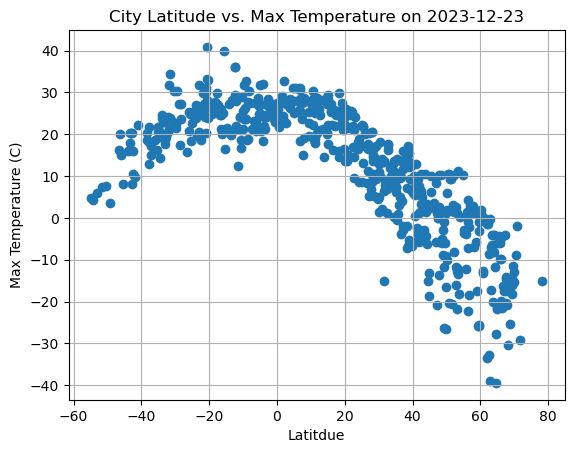

In [52]:
#Build scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')
# Use date in plot title, today variable from when file saved.
# Add Title, X and Y lables and grid
plt.title (f'City Latitude vs. Max Temperature on {today}')
plt.xlabel('Latitdue')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

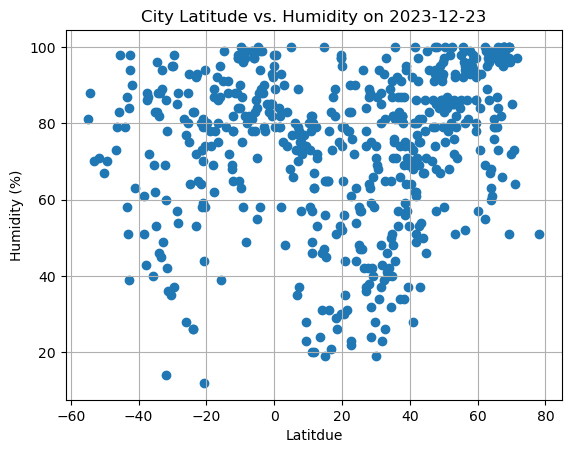

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')
# Use date in plot title, today variable from when file saved.
# Add Title, X and Y lables and grid
plt.title (f'City Latitude vs. Humidity on {today}')
plt.xlabel('Latitdue')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

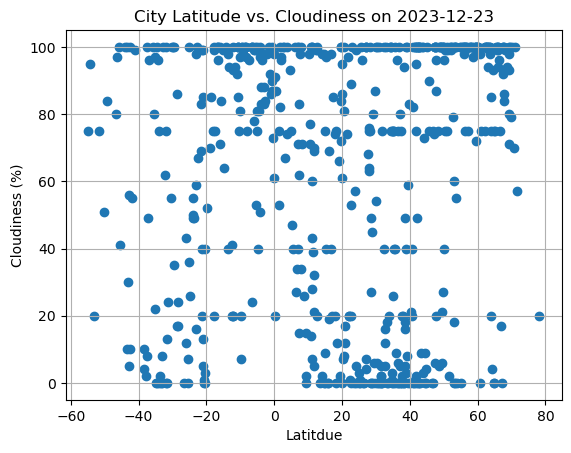

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Clouds'], marker='o')
# Use date in plot title, today variable from when file saved.
# Add Title, X and Y lables and grid
plt.title (f'City Latitude vs. Cloudiness on {today}')
plt.xlabel('Latitdue')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

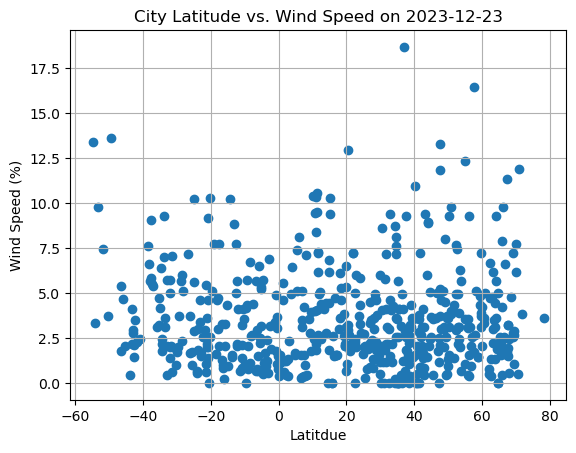

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind'], marker='o')
# Use date in plot title, today variable from when file saved.
# Add Title, X and Y lables and grid
plt.title (f'City Latitude vs. Wind Speed on {today}')
plt.xlabel('Latitdue')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Add functions to position the line_eq in the upper or lower corners for readability.
def Upper_left(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[0]
    y_pos = ax.get_ylim()[1]
    ax.annotate(text, xy=(x_pos, y_pos), ha='left', va='top', fontsize=fontsize, color=color)

def Upper_right(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[1]
    y_pos = ax.get_ylim()[1]
    ax.annotate(text, xy=(x_pos, y_pos), ha='right', va='top', fontsize=fontsize, color=color)

def Lower_left(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[0]
    y_pos = ax.get_ylim()[0]
    ax.annotate(text, xy=(x_pos, y_pos), ha='left', va='bottom', fontsize=fontsize, color=color)

def Lower_right(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[1]
    y_pos = ax.get_ylim()[0]
    ax.annotate(text, xy=(x_pos, y_pos), ha='right', va='bottom', fontsize=fontsize, color=color)

# Create a function to display line_eq not over datapoints
def find_best_position(x, y):
    #calculate mean values
    mean_x = x.mean()
    mean_y = y.mean()
    # define potential positions
    positions = [
        (0.1,0.9), # Upper Left
        (0.9,0.9), # Upper Right
        (0.1,0.1), # Lower Right
        (0.9,0.1) # Lower Right
    ]
    #Check each position and find one without overlapping a datapoint
    for position in positions:
        if not any((mean_x - 0.1 < x < mean_x + 0.1 and mean_y - 0.1 < y < mean_y + 0.1) for x, y in zip(x, y)):
            return position
    # Default position otherwise
    return (0.1,0.9)


In [35]:
# Add functions to position the line_eq in the upper or lower corners for readability.
def Upper_left(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[0]
    y_pos = ax.get_ylim()[1]
    ax.annotate(text, xy=(x_pos, y_pos), ha='left', va='top', fontsize=fontsize, color=color)

def Upper_right(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[1]
    y_pos = ax.get_ylim()[1]
    ax.annotate(text, xy=(x_pos, y_pos), ha='right', va='top', fontsize=fontsize, color=color)

def Lower_left(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[0]
    y_pos = ax.get_ylim()[0]
    ax.annotate(text, xy=(x_pos, y_pos), ha='left', va='bottom', fontsize=fontsize, color=color)

def Lower_right(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[1]
    y_pos = ax.get_ylim()[0]
    ax.annotate(text, xy=(x_pos, y_pos), ha='right', va='bottom', fontsize=fontsize, color=color)

def Center_left(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[0]
    y_pos = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2
    ax.annotate(text, xy=(x_pos, y_pos), ha='left', va='bottom', fontsize=fontsize, color=color)

def Center_right(ax, text, fontsize=15, color='red'):
    x_pos = ax.get_xlim()[1]
    y_pos = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2
    ax.annotate(text, xy=(x_pos, y_pos), ha='right', va='bottom', fontsize=fontsize, color=color)



# Define a function to create Linear Regression plots
def perform_linear_regression(df, x_value, y_value, x_label, y_label, position='UL'):
    # df is dataframe
    # Extract the values of x and y
    x = df[x_value].values
    y = df[y_value].values
    #Perform linear regression 
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    # Create a regression line
    regress_values = x * slope + intercept
    #Create the line equation
    line_eq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))  
    #Position for line_eq from input
    positions = {
        'UL': Upper_left,
        'UR': Upper_right,
        'LL': Lower_left,
        'LR': Lower_right,
        'ML': Center_left,
        'MR': Center_right
    }
    #select the postion based on string input
    position = positions.get(position, Upper_left)
    
    #Create the plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    #Create the Labels and the line equation.
    position(plt.gca(), line_eq, fontsize=15, color='red')
    # Accepts x_label and y_label as inputs
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.annotate(line_eq, xy=(0.9,0.1), ha='left', va='bottom', fontsize=15, color='red')
    
    plt.title(f'{y_label} vs. {x_label} Linear Regression Plot')
    # Print the r value
    print (f'The r-value is: {rvalue**2}')
    #Show the plot
    plt.show()
    # Return the results as a dictionary
    results = {
        'slope': slope,
        'intercept': intercept,
        'rvalue': rvalue,
        'pvalue': pvalue,
        'std_err': stderr
    }
    return results          


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
2,ornskoldsvik,63.2909,18.7153,-6.47,86.0,100.0,6.17,SE,1.703305e+09
3,kratie,12.4881,106.0188,25.98,53.0,100.0,4.37,KH,1.703305e+09
7,argo,37.6333,22.7333,13.21,82.0,2.0,1.82,GR,1.703305e+09
8,sarikei,2.1167,111.5167,32.68,58.0,96.0,1.24,MY,1.703305e+09
10,divnogorsk,55.9594,92.3619,0.41,96.0,98.0,3.05,RU,1.703305e+09


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,26.77,82.0,100.0,3.65,MV,1.703305e+09
1,grytviken,-54.2811,-36.5092,4.23,88.0,95.0,3.31,GS,1.703305e+09
4,papatowai,-46.5619,169.4708,16.24,73.0,80.0,5.40,NZ,1.703305e+09
5,port-aux-francais,-49.3500,70.2167,3.58,70.0,84.0,13.63,TF,1.703305e+09
6,santo antonio do ica,-3.1022,-67.9397,24.20,90.0,88.0,0.53,BR,1.703305e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7607620475437263


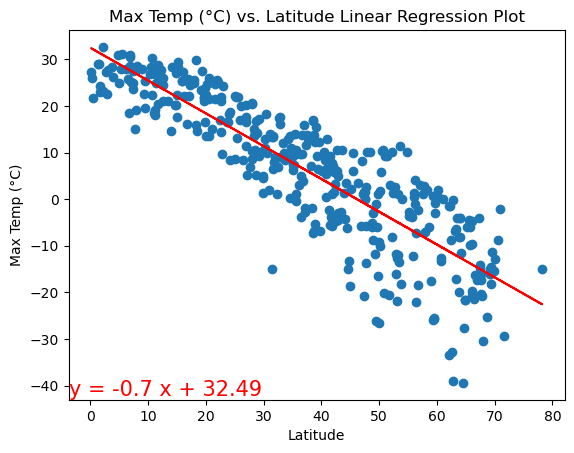

In [42]:
# Linear regression on Northern Hemisphere
# set position for line_eq to display
results = perform_linear_regression(north_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp (\u00b0C)', position='LL')

The r-value is: 0.2967863916095136


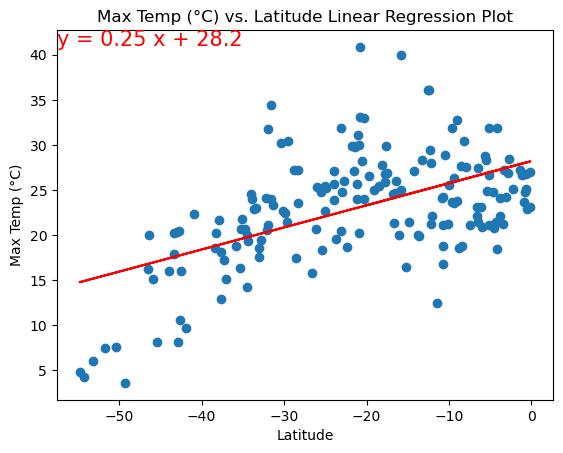

In [43]:
# Linear regression on Southern Hemisphere
results = perform_linear_regression(south_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp (\u00b0C)', position='UL')

**Discussion about the linear relationship:** 
In both instances the closer to 0 Latitiude the higher the temperature.
For the Northern Hemisphere this equates to a negative slope and for the Southern Hemispere a positive slope.
For the Northern Hemisphere a high r- value (0.76) indicates a strong relationship.
There were more outlier datapoints in the Southern Hemisphere plot, which also had a lower r- value (0.297) and lower confidence in results.
There were also more datapoints in the Northern Hemisphere which may also contribute to the higher confidence score.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14935856420627278


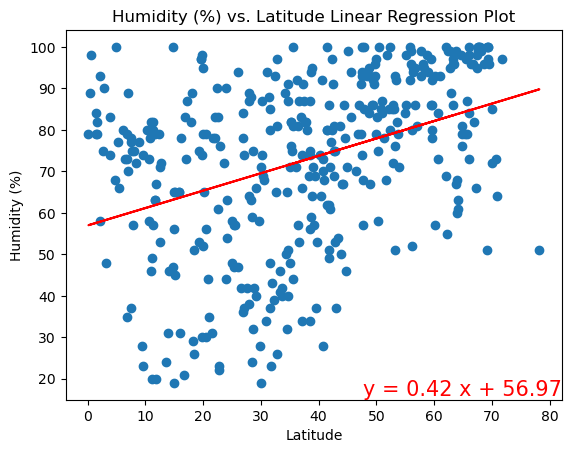

In [44]:
# Northern Hemisphere
results = perform_linear_regression(north_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity (%)', position='LR')

The r-value is: 0.07808869684933234


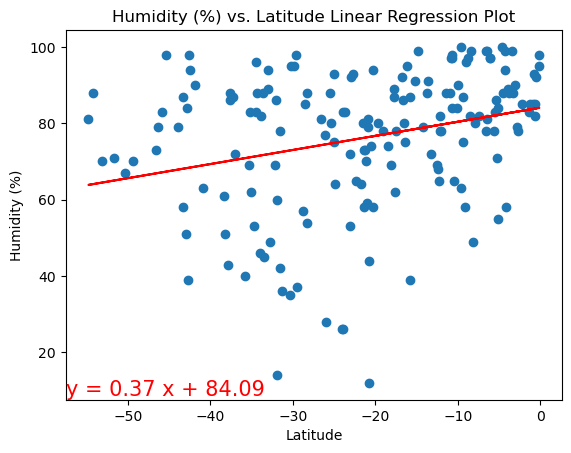

In [45]:
# Southern Hemisphere
results = perform_linear_regression(south_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity (%)', position='LL')

**Discussion about the linear relationship:** 
Both plots indicate a positive trend - the further North you go the higher the Humidity is.
The strength of the relationship are not very high (both are less than 0.2 r- values) indicating this may not be a correct assumption.
There were more datapoints in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05433506932952302


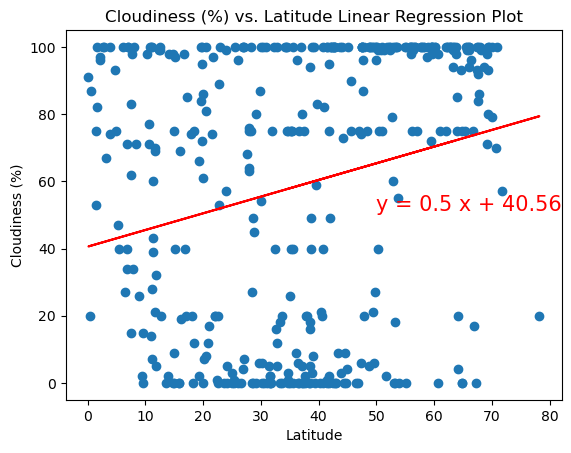

In [46]:
# Northern Hemisphere
results = perform_linear_regression(north_hemi_df, 'Lat', 'Clouds', 'Latitude', 'Cloudiness (%)', position='MR')

The r-value is: 0.10689407232069854


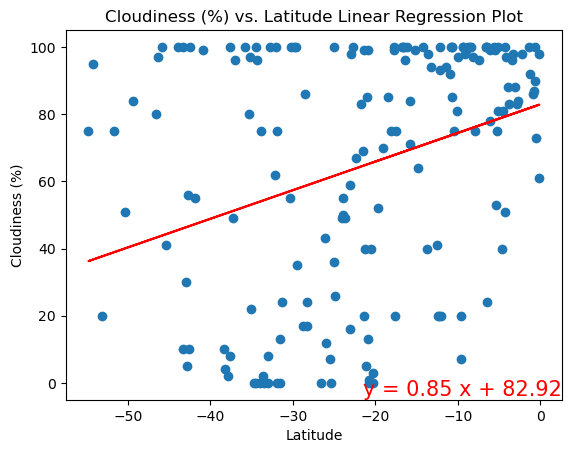

In [47]:
# Southern Hemisphere
results = perform_linear_regression(south_hemi_df, 'Lat', 'Clouds', 'Latitude', 'Cloudiness (%)', position='LR')

**Discussion about the linear relationship:** 

Both plots indicate a positive trend - the further North you go the more clouds there are.
The strength of the relationship are not very high (both are less than 0.2 r- values) indicating this may not be a correct assumption.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.000995559787494278


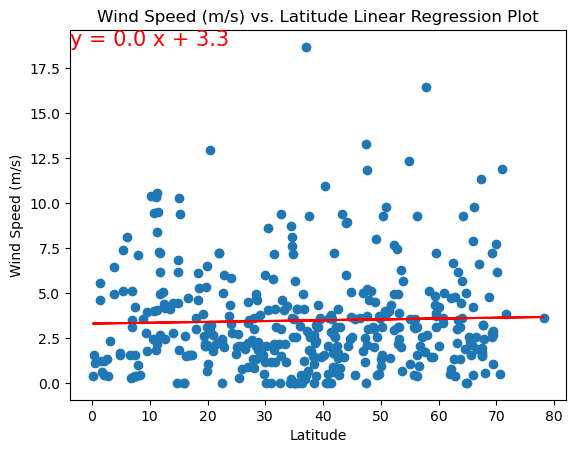

In [48]:
# Northern Hemisphere
results = perform_linear_regression(north_hemi_df, 'Lat', 'Wind', 'Latitude', 'Wind Speed (m/s)', position='UL')

The r-value is: 0.08439146194507943


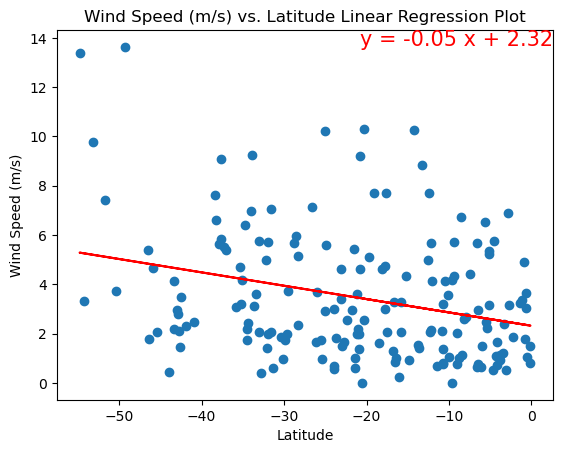

In [49]:
# Southern Hemisphere
results = perform_linear_regression(south_hemi_df, 'Lat', 'Wind', 'Latitude', 'Wind Speed (m/s)', position='UR')

**Discussion about the linear relationship:** 
There is a very weak correlation between wind speed and latitiude. The Northern Hemisphere appears to have more outliers than the Southern Hemisphere. There are more datapoints in the Northern Hemisphere grouping.